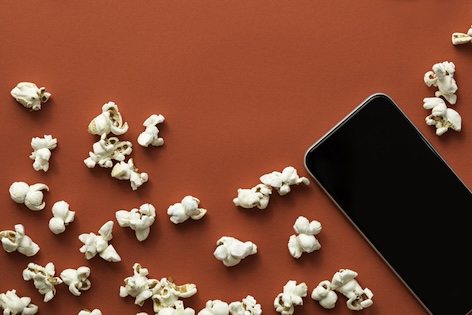

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## How to approach the project
1. Filter the data for movies released in the 1990s

2. Find the most frequent movie duration

3. Count the number of short action movies from the 1990s

In [12]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def load_and_inspect_netflix_data(file_path):
    """
    Reads in the Netflix CSV as a DataFrame, displays information about the DataFrame,
    counts missing values, and shows the first few rows.

    Parameters:
    file_path (str): The path to the Netflix CSV file.

    Returns:
    pd.DataFrame: The loaded Netflix DataFrame.
    """
    # Read in the Netflix CSV as a DataFrame
    netflix_df = pd.read_csv(file_path)
    
    # Display information about the DataFrame
    netflix_df.info()
    
    # Count missing values
    print(netflix_df.isna().sum())
    
    # Show the first few rows
    display(netflix_df.head())
    
    return netflix_df

# Example usage
netflix_df = load_and_inspect_netflix_data("netflix_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


### 1. Filter the data for movies released in the 1990s
Subset the DataFrame to keep only the movies and then filter the years so that you are working with rows where the release year is between 1990 and 1999 (90s decade)

In [14]:
# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
print(netflix_subset)                  

     show_id  ...          genre
0         s2  ...         Dramas
1         s3  ...  Horror Movies
2         s4  ...         Action
3         s5  ...         Dramas
5         s7  ...  Horror Movies
...      ...  ...            ...
4807   s7779  ...       Comedies
4808   s7781  ...         Dramas
4809   s7782  ...       Children
4810   s7783  ...         Dramas
4811   s7784  ...         Dramas

[4677 rows x 11 columns]


In [15]:
decade_90s = [x for x in range(1990, 2000)]
decade_90s

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]

In [16]:
movie_90s = netflix_subset[netflix_subset['release_year'].isin(decade_90s)]
movie_90s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
4689,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
4718,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
4746,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


### 2. Find the most frequent movie duration
Visualize the data to view the distributions of durations for movies released in the 1990s

In [17]:
# Group by 'duration' and count the occurrences
duration_counts = movie_90s['duration'].value_counts()

# Find the most frequent duration
most_frequent_duration = duration_counts.idxmax()

# Save the result as an integer
duration = int(most_frequent_duration)

duration

94

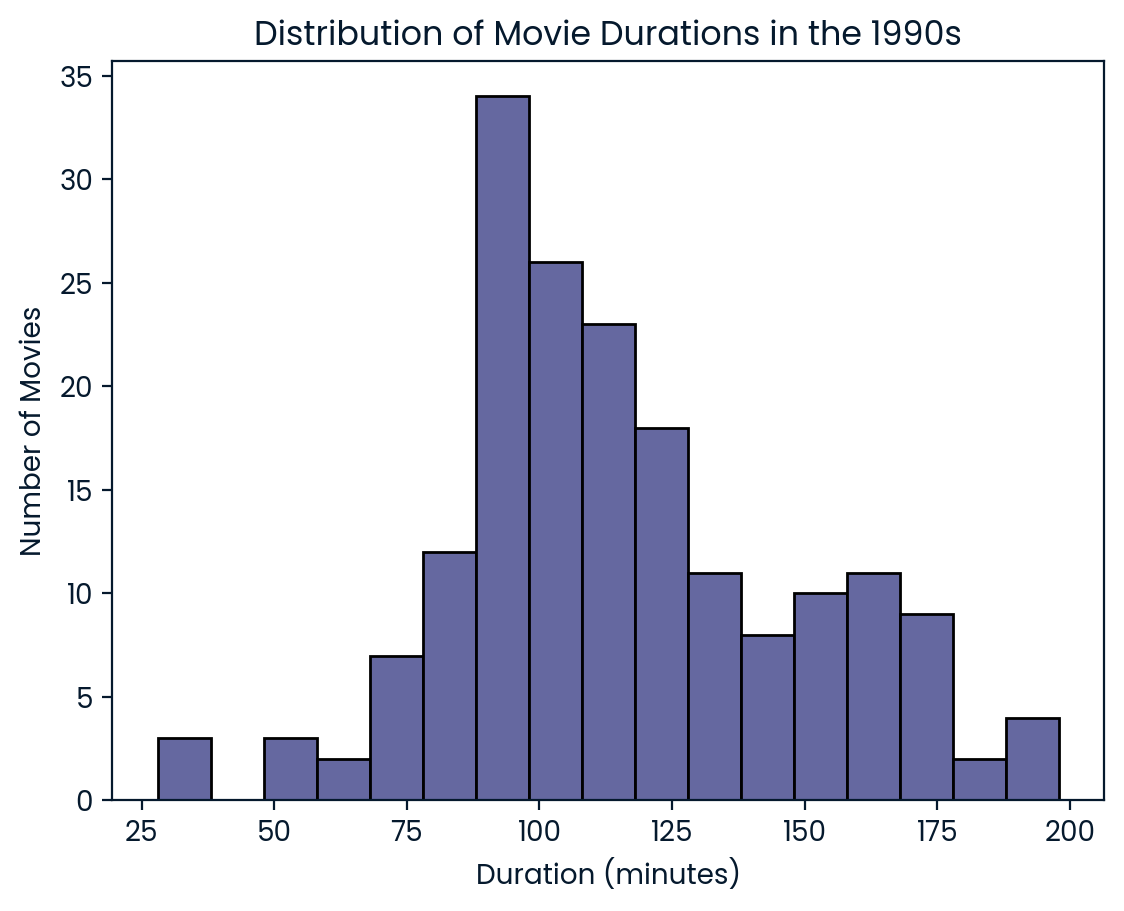

In [18]:
import matplotlib.pyplot as plt

# Plot histogram
movie_90s["duration"].plot(kind='hist', bins=range(min(movie_90s["duration"]), max(movie_90s["duration"]) + 10, 10), edgecolor='black')

plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

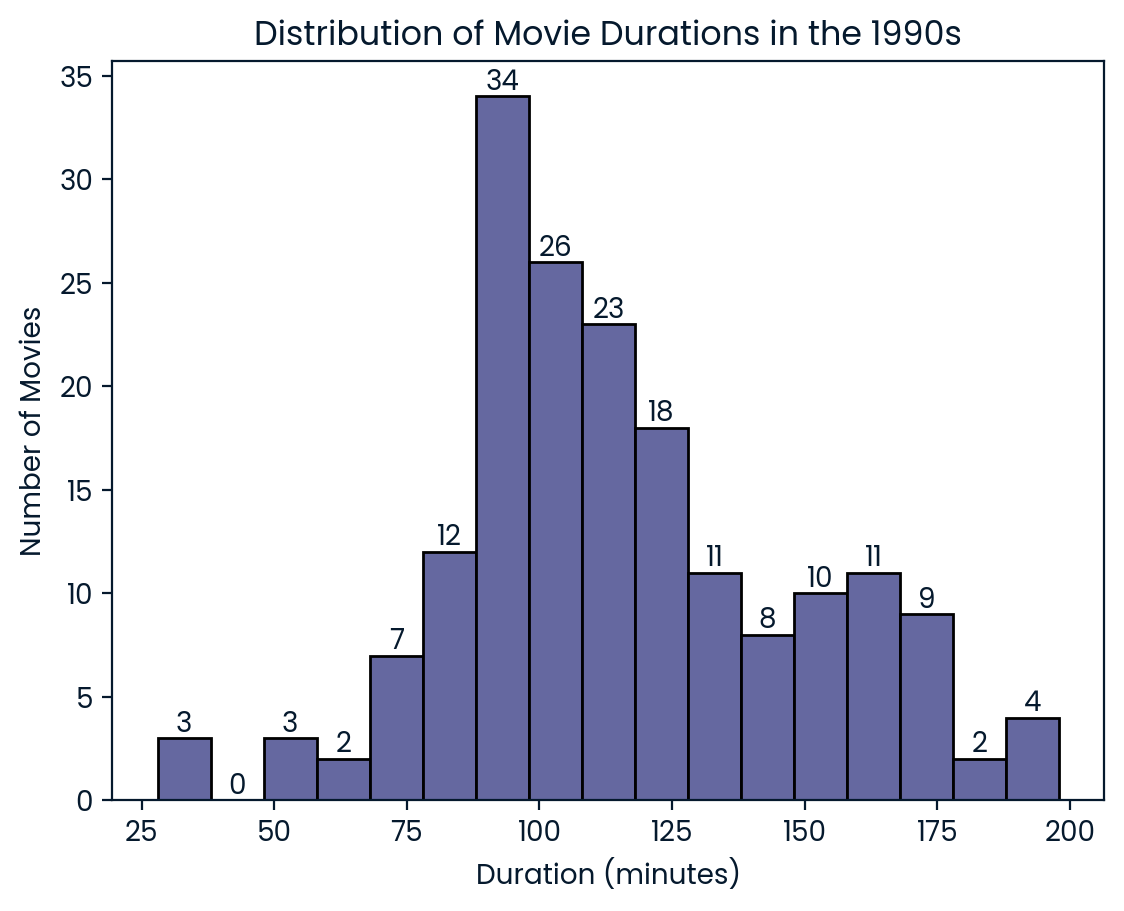

In [19]:
# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram
n, bins, patches = plt.hist(movie_90s["duration"], bins=range(min(movie_90s["duration"]), max(movie_90s["duration"]) + 10, 10), edgecolor='black')

# Add labels to each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), str(int(n[i])), ha='center', va='bottom')

plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [20]:
# Calculate the most frequent movie duration in the 1990s
most_frequent_duration = movie_90s['duration'].mode()[0]

# Save the result as an integer
approximate_duration = int(most_frequent_duration)
approximate_duration

94

### 3. Count the number of short action movies from the 1990s
First, subset the data again to keep only movies with the correct genre. Then, iterate through the data and count the number of movies depending on the condition pf a duration that is less than 90

In [21]:
action_90s = movie_90s[movie_90s['genre']=='Action']
action_90s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action
468,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,"October 1, 2019",1995,119,"In this fast-paced actioner, two Miami narcoti...",Action
515,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,"April 1, 2018",1995,166,A naïve young man and a rich city girl fall in...,Action
675,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place afte...,Action
815,s1236,Movie,Casino Tycoon,Wong Jing,Wong Jing,Hong Kong,"August 1, 2018",1992,125,"When Japanese troops invade Hong Kong, young B...",Action
816,s1237,Movie,Casino Tycoon 2,Wong Jing,Dennis Chan,Hong Kong,"August 16, 2018",1992,108,Casino mogul Benny Ho wields enormous power. B...,Action
1018,s1605,Movie,Dante's Peak,Roger Donaldson,"Pierce Brosnan, Linda Hamilton, Elizabeth Hoff...",United States,"September 1, 2019",1997,108,When a volcanologist comes to investigate the ...,Action
1179,s1850,Movie,Dragonheart,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pet...",United States,"January 1, 2020",1996,103,In ancient times when majestic fire-breathers ...,Action
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action


In [22]:
short_movie_count = action_90s[action_90s['duration'] < 90].shape[0]

short_movie_90s = action_90s[action_90s['duration'] < 90]

display(short_movie_count)
display(short_movie_90s)

7

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
3806,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
3943,s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action
